In [1]:
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib import rc 
from scipy.optimize import curve_fit

In [2]:
g = 9.8
y0 = 0.
v0 = 10.

C = 10
d = 1.225
r = 0.05
m = 1.0

def yideal(t_):
    return y0 + v0*t_ -0.5*g*t_**2

def videal(t_):
    return v0 - g*t_

def yair(t_, C_, r_):
    gamma = np.sqrt( (C_*d*np.pi*r_**2)/(2.*m) )

    arg1 = np.arctanh( (gamma*v0)/(np.sqrt(g)) )
    arg2 = -gamma*np.sqrt(g)*t_ + np.arctanh( (gamma*v0)/(np.sqrt(g)) )
    
    y = y0 + np.log( np.cosh(arg1) / np.cosh(arg2) )/(gamma**2)
    
    return y

def vair(t_, C_, r_):
    gamma = np.sqrt( (C_*d*np.pi*r_**2)/(2.*m) )
    arg1 = -gamma*np.sqrt(g)*t_ + np.arctanh( (gamma*v0)/(np.sqrt(g)) )
 
    v = ( np.sqrt(g)/gamma  ) * ( np.tanh( arg1 ) )
    return v
    

In [3]:
t = 0.
deltat = 0.001

ytmp = 0.

T = []
Y = []
V = []

while(ytmp >= 0.):
    T.append(t)
    Y.append(yideal(t))
    V.append(videal(t))
    ytmp = yideal(t)
    t += deltat
    #print(t)

#print(len(Y))


t1 = 0.

T1 = []
Y1 = []
V1 = []

ytmp = 0.
deltat1 = 0.001

while(ytmp >= 0.):
    T1.append(t1)
    Y1.append(yair(t1, C, r))
    ytmp = yair(t1, C, r)
    V1.append(vair(t1, C, r))
    #print(ytmp, vair(t1, C, r))
    t1 += deltat1
    
tiempo_vuelo_f = T[-1]
tiempo_vuelo_air = T1[-1]
print(tiempo_vuelo_f, tiempo_vuelo_air)

(2.0409999999998862, 2.5299999999998324)


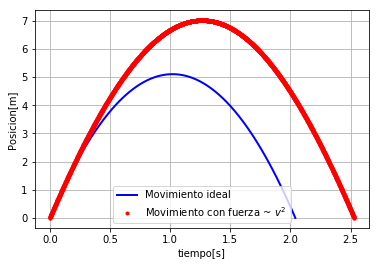

In [20]:
fig, ax = plt.subplots()
p1 = ax.plot(T, Y, 'b', linewidth=2, label='Movimiento ideal')
p2 = ax.plot(T1, Y1, 'r.', linewidth=2, label=r'Movimiento con fuerza ~ $v^{2}$')
ax.set(xlabel = 'tiempo[s]', ylabel = 'Posicion[m]', title='')
ax.grid()
ax.legend()


plt.show()

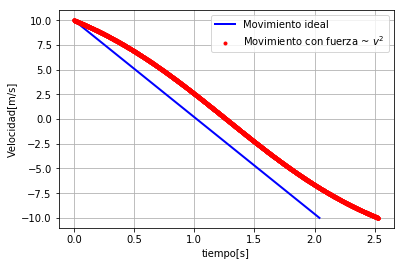

In [21]:
fig, ax = plt.subplots()
p1 = ax.plot(T,  V, 'b',   linewidth=2, label='Movimiento ideal')
p2 = ax.plot(T1, V1, 'r.', linewidth=2, label=r'Movimiento con fuerza ~ $v^{2}$')
ax.set(xlabel = 'tiempo[s]', ylabel = 'Velocidad[m/s]', title='')
ax.grid()
ax.legend()


plt.show()

# Números Primos

In [6]:
def isPrime(x):
    isPrime_ = np.any([x%i == 0 for i in range(2,x)])
    return not isPrime_

In [7]:
index = []
number = []

i = 2;
size = 1;

while(size != 1000):
    
    if(isPrime(i)):
        index.append(size)
        number.append(i)
        size += 1

    i += 1
        
#print(index,number)

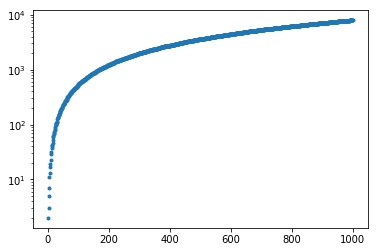

In [8]:
plt.scatter(index,number,marker='.')
plt.yscale('log') 

In [9]:
exact_aureo = (1 + np.sqrt(5))/2

def ComputeFibo(N):
    serie = []
    aureo = []
    error = []
    a, b, aurea = 0, 1, 0.
    serie.append(a)
    serie.append(b)
    
    while (b < N):
        a, b = b, a+b
        tmp = float(b)/float(a)
        serie.append(b)
        aureo.append(tmp)
        error.append(abs(tmp-exact_aureo)/(exact_aureo))
    
    return serie, aureo, error

In [10]:
Nserie = 10000000
Serie, Aureo, Error = ComputeFibo(Nserie)

Npoints = []
for i in range(len(Error)):
    i += 1
    Npoints.append(i)

print(Serie)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352]


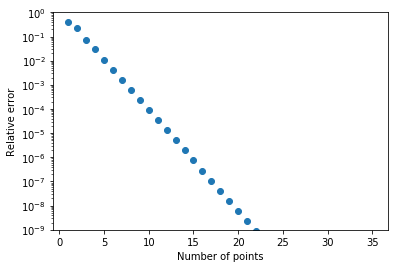

In [11]:
plt.scatter(Npoints, Error, label='')
plt.xlabel('Number of points')

plt.ylabel('Relative error')
plt.yscale('log')
plt.ylim(1e-9, 1.)
plt.show()

In [12]:
def Fit(N_,A,B):
    return (A)/(N_**B)

(A, B), _ = curve_fit(Fit, Npoints, Error)
print(A,B, np.sqrt(2))

(0.40233922492119384, 1.4853066642304593, 1.4142135623730951)


 $\sigma(N) \sim \frac{1}{\sqrt{N}} $

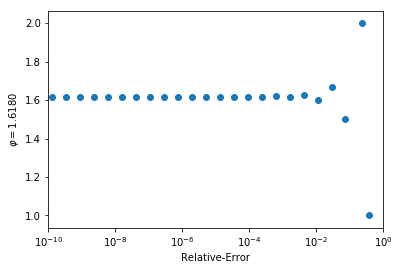

In [13]:
plt.scatter(Error, Aureo, label='')
plt.xlabel('Relative-Error')
plt.xlim(1e-10, 1.)
plt.xscale('log')
plt.ylabel(r'$\varphi=%.4f$' %(exact_aureo))
plt.show()

Fitting $f(t) = \frac{A}{1+e^{-Bt}}$

In [14]:
file = 'data/Hw_data.dat'
data = np.loadtxt(file, comments='#')

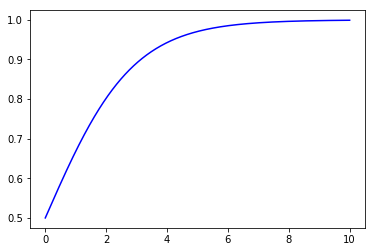

In [15]:
t = data[:,0]
y = data[:,1]
plt.plot(t,y,'b', label='')

In [16]:
def FitFunction(t_,A,B):
    return (A)/(1+np.exp(-B*t_))

In [17]:
(A, B), _ = curve_fit(FitFunction, t, y)
print(A,B)

(0.9999999401926466, 0.7000007635889537)


In [18]:
t1 = np.linspace(0.,10., 10)
y1 = np.zeros(10)
for i in range(len(t1)):
    y1[i] = FitFunction(t1[i], A,B)  

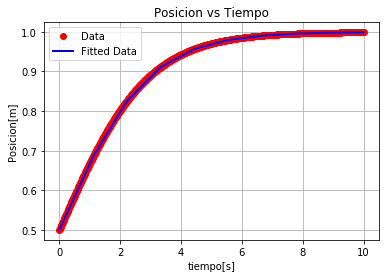

In [19]:
fig, ax = plt.subplots()
p1 = ax.plot(t,  y,  'ro', linewidth=2, label='Data')
p2 = ax.plot(t1, y1, 'b', linewidth=2, label='Fitted Data')
ax.set(xlabel = 'tiempo[s]', ylabel = 'Posicion[m]', title='Posicion vs Tiempo')
ax.grid()
ax.legend()
fig.savefig('Fitting.pdf')